In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

In [2]:
housing_data = pd.read_csv("sample_data/california_housing_train.csv")

In [3]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [4]:
attributes = housing_data.drop(columns = ["median_house_value"])
target = housing_data.median_house_value

In [5]:
attributes_train_val, attributes_test, target_train, target_test = train_test_split(attributes, target, test_size = 0.25)

In [6]:
attributes_train, attributes_val, target_train, target_val = train_test_split(attributes_train_val, target_train, test_size = 0.15)

In [7]:
len(attributes_train), len(attributes_val), len(attributes_test)

(10837, 1913, 4250)

In [8]:
scaler = MinMaxScaler()
attributes_train = scaler.fit_transform(attributes_train)
attributes_val = scaler.fit_transform(attributes_val)
attributes_test = scaler.transform(attributes_test)

In [9]:
num_columns = attributes_train.shape[1]
num_outputs = 1
DROPOUT_RATE = 0.5

In [10]:
tf.keras.backend.clear_session()

In [11]:
model = Sequential([
    Input(num_columns),
    Dense(64, activation = "relu", kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 0.005, l2 = 0.5)),
    Dropout(DROPOUT_RATE),
    Dense(32, activation = "relu", kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 0.005, l2 = 0.5)),
    Dropout(DROPOUT_RATE),
    Dense(32, activation = "relu", kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 0.005, l2 = 0.5)),
    Dropout(DROPOUT_RATE),
    Dense(num_outputs, activation = None),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [13]:
model.compile(loss = "mse")

In [14]:
history = model.fit(attributes_train, target_train, epochs = 10, validation_data = (attributes_val, target_val))

Epoch 1/10
339/339 [==============================] - 6s 8ms/step - loss: 56555106304.0000 - val_loss: 53193908224.0000
Epoch 2/10
339/339 [==============================] - 2s 5ms/step - loss: 52550635520.0000 - val_loss: 44122607616.0000
Epoch 3/10
339/339 [==============================] - 2s 7ms/step - loss: 35878776832.0000 - val_loss: 19926444032.0000
Epoch 4/10
339/339 [==============================] - 2s 6ms/step - loss: 17692604416.0000 - val_loss: 11881783296.0000
Epoch 5/10
339/339 [==============================] - 2s 5ms/step - loss: 15800812544.0000 - val_loss: 11518062592.0000
Epoch 6/10
339/339 [==============================] - 2s 6ms/step - loss: 15602932736.0000 - val_loss: 11228204032.0000
Epoch 7/10
339/339 [==============================] - 1s 4ms/step - loss: 15331487744.0000 - val_loss: 10895787008.0000
Epoch 8/10
339/339 [==============================] - 1s 4ms/step - loss: 15047899136.0000 - val_loss: 10579955712.0000
Epoch 9/10
339/339 [====================

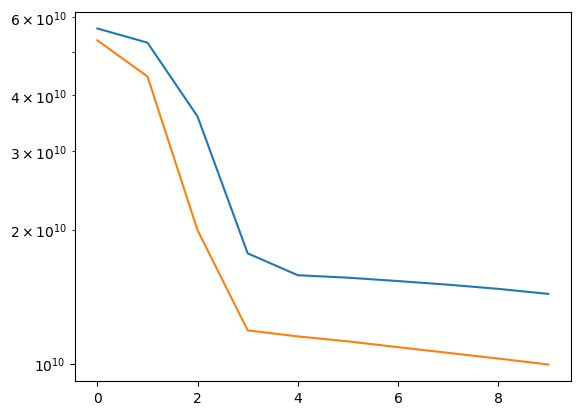

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.semilogy()
plt.show()

In [16]:
model.predict(attributes_train)

339/339 [==============================] - 1s 2ms/step


array([[220909.62],
       [181050.39],
       [217572.33],
       ...,
       [188965.64],
       [206723.11],
       [175485.55]], dtype=float32)

In [17]:
model.evaluate(attributes_train, target_train)

339/339 [==============================] - 1s 2ms/step - loss: 10647889920.0000


10647889920.0

In [18]:
model.evaluate(attributes_test, target_test)

133/133 [==============================] - 0s 1ms/step - loss: 10781227008.0000


10781227008.0